MNIST
=========

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

load data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

data plot

In [31]:
import matplotlib.pyplot as plt

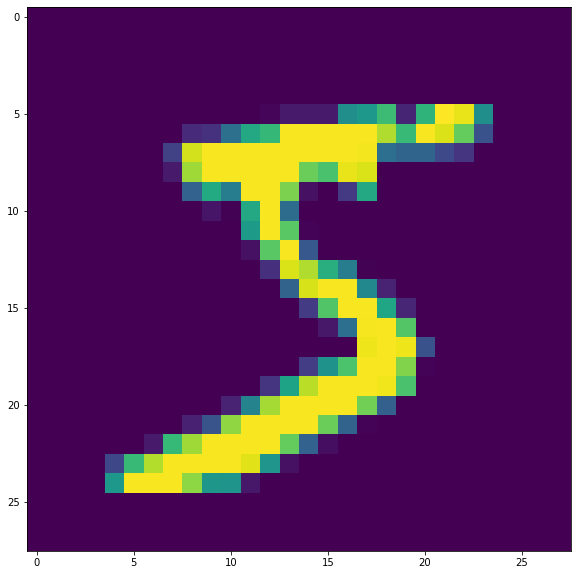

label : 5


In [36]:
idx = 0
pixel = x_train[idx]
label = y_train[idx]
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(pixel)
plt.show()
print('label : ' + str(label))

x data

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [57]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

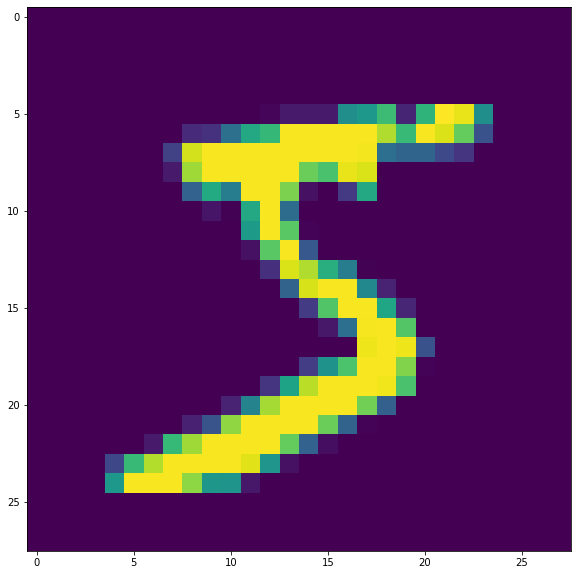

label : 5


In [58]:
idx = 0
pixel = x_train[idx].reshape((28,28))
label = y_train[idx]
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(pixel)
plt.show()
print('label : ' + str(label))

y data

In [59]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [61]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

train_valid_split

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10), (6000, 10))

build model

In [9]:
inp = keras.Input(shape=(28,28,1))
mid = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
mid = layers.MaxPooling2D(pool_size=(2, 2))(mid)
mid = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(mid)
mid = layers.MaxPooling2D(pool_size=(2, 2))(mid)
mid = layers.Flatten()(mid)
mid = layers.Dropout(0.5)(mid)
out = layers.Dense(10, activation="softmax")(mid)

model = keras.Model(inputs = inp, outputs = out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)             

compile

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
callback_list = [stopping, reducing]

In [13]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_valid, y_valid), callbacks = callback_list)  

Epoch 1/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2169 - accuracy: 0.9334 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch 2/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 3/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9806 - val_loss: 0.0403 - val_accuracy: 0.9868
Epoch 4/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 5/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 6/100
1580/1688 [===========================>..] - ETA: 0s - loss: 0.0447 - accuracy: 0.9856

KeyboardInterrupt: ignored

how to use gpu

In [17]:
!nvidia-smi

Mon Sep 28 03:37:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |    745MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train, x_test = x_train/255. , x_test/255.
    x_train, x_test = x_train.reshape((-1,28,28,1)), x_test.reshape((-1,28,28,1))
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

    return x_train, y_train, x_valid, y_valid, x_test, y_test

def build_model():
    inp = keras.Input(shape=(28,28,1))
    mid = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    mid = layers.MaxPooling2D(pool_size=(2, 2))(mid)
    mid = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(mid)
    mid = layers.MaxPooling2D(pool_size=(2, 2))(mid)
    mid = layers.Flatten()(mid)
    mid = layers.Dropout(0.5)(mid)
    out = layers.Dense(10, activation="softmax")(mid)

    model = keras.Model(inputs = inp, outputs = out)
    # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def fit_model(model, x_train, y_train, x_valid, y_valid):
    stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
    reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
    callback_list = [stopping, reducing]
    # with tf.device('/device:GPU:0'):
    model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_valid, y_valid), callbacks = callback_list) 
    return model

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data()
model = build_model()
model = fit_model(model, x_train, y_train, x_valid, y_valid)
model.evaluate(x_test,y_test)

Epoch 1/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2222 - accuracy: 0.9320 - val_loss: 0.0802 - val_accuracy: 0.9768
Epoch 2/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9739 - val_loss: 0.0607 - val_accuracy: 0.9822
Epoch 3/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 4/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0442 - val_accuracy: 0.9852
Epoch 5/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0449 - val_accuracy: 0.9853
Epoch 6/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0402 - val_accuracy: 0.9877
Epoch 7/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0348 - val_ac

[0.028683984652161598, 0.992900013923645]

CIFAR10
===========

In [13]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

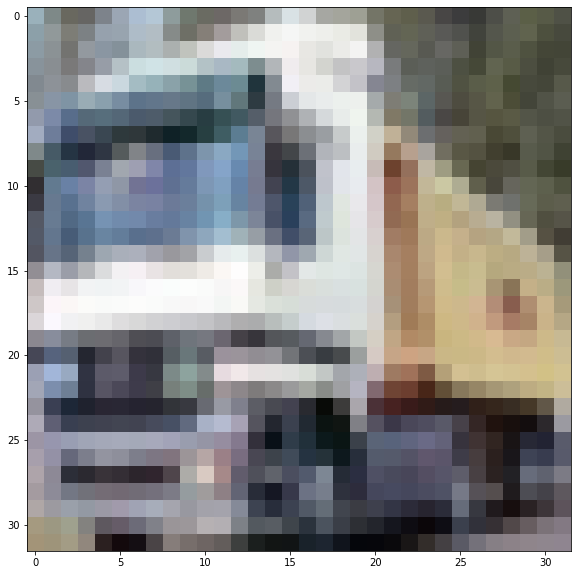

label : [9]


In [8]:
import matplotlib.pyplot as plt
idx = 1
pixel = x_train[idx]
label = y_train[idx]
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(pixel)
plt.show()
print('label : ' + str(label))

resnet50

In [14]:
def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train/255. , x_test/255.
    # x_train, x_test = x_train.reshape((-1,32,32,3)), x_test.reshape((-1,32,32,3))
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

    return x_train, y_train, x_valid, y_valid, x_test, y_test

def build_model():
    resnet50 = keras.applications.ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=(32,32,3),pooling=None)
    mid = layers.GlobalAveragePooling2D()(resnet50.output)
    mid = layers.Dense(128, activation = 'relu')(mid)
    out = layers.Dense(10, activation='softmax')(mid)
    model = keras.Model(inputs = resnet50.inputs, outputs = out)
    # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def fit_model(model, x_train, y_train, x_valid, y_valid):
    stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
    reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
    callback_list = [stopping, reducing]
    # with tf.device('/device:GPU:0'):
    model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_valid, y_valid), callbacks = callback_list)  
    return model

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data()
model = build_model()
model = fit_model(model, x_train, y_train, x_valid, y_valid)
model.evaluate(x_test,y_test)

Epoch 1/100
   3/1407 [..............................] - ETA: 29:26 - loss: 5.3225 - accuracy: 0.0938

KeyboardInterrupt: ignored

Resize method and Sequence - about memory problem
---------

InceptionResnetV2 (this will fail)

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
## 위에는 같다.
from tensorflow.image import resize, ResizeMethod  

label : [9]


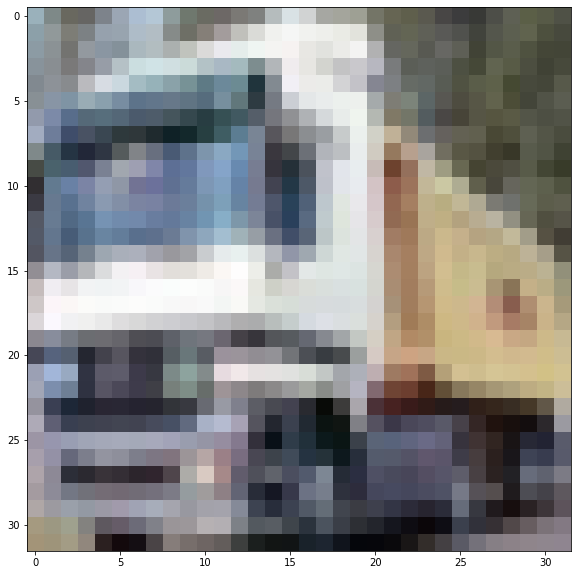

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


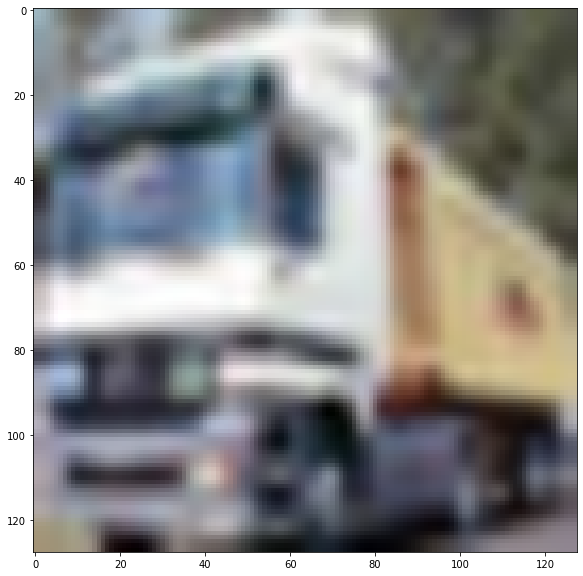

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
x_train = x_train/255.
idx = 1
pixel = x_train[idx]
label = y_train[idx]
print('label : ' + str(label))

plt.imshow(pixel)
plt.show()

pixel2 = resize(pixel.reshape(1,32,32,3), [32 * 4, 32 * 4], method = ResizeMethod.BICUBIC).numpy().reshape(32 * 4, 32 * 4, 3)
plt.imshow(pixel2)
plt.show()

In [ ]:
def load_data(rate):
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train/255. , x_test/255.
    # x_train, x_test = x_train.reshape((-1,32,32,3)), x_test.reshape((-1,32,32,3))
    x_train = resize(x_train, [32 * rate, 32 * rate], method = ResizeMethod.BICUBIC).numpy()   # this fails
    x_test = resize(x_test, [32 * rate, 32 * rate], method = ResizeMethod.BICUBIC).numpy()
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

    return x_train, y_train, x_valid, y_valid, x_test, y_test

def build_model():
    resnet50 = keras.applications.InceptionResNetV2(include_top=False, weights=None, input_tensor=None, input_shape=(32,32,3),pooling=None)
    mid = layers.GlobalAveragePooling2D()(resnet50.output)
    mid = layers.Dense(128, activation = 'relu')(mid)
    out = layers.Dense(10, activation='softmax')(mid)
    model = keras.Model(inputs = resnet50.inputs, outputs = out)
    # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def fit_model(model, x_train, y_train, x_valid, y_valid):
    stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
    reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
    callback_list = [stopping, reducing]
    # with tf.device('/device:GPU:0'):
    model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_valid, y_valid), callbacks = callback_list)  
    return model

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(4)
model = build_model()
model = fit_model(model, x_train, y_train, x_valid, y_valid)
model.evaluate(x_test,y_test)

InceptionResnetV2 (with sequence)

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.image import resize, ResizeMethod
#########################33
import math
from tensorflow.keras.utils import Sequence

In [34]:
class Dataset(Sequence):
    def __init__(self, pixel, label, batch_size, rate = 4):
        self.pixel = pixel
        self.label =  label
        self.batch_size = batch_size
        self.length = math.ceil(len(label) // batch_size)
        self.target = pixel.shape[1] * rate

    def __getitem__(self, idx):
        i = idx * self.batch_size
        if i + self.batch_size > len(self.label):
            pixel = self.pixel[i:]
            label = self.label[i:]
        else:
            pixel = self.pixel[i:i+self.batch_size]
            label = self.label[i:i+self.batch_size]

        pixel = resize(pixel, [self.target, self.target], method = ResizeMethod.BICUBIC).numpy()
        pixel = np.asarray(pixel)
        return pixel, label

    def __len__(self):
        return self.length

In [18]:
batch_size = 32

In [35]:
def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train/255. , x_test/255.
    # x_train, x_test = x_train.reshape((-1,32,32,3)), x_test.reshape((-1,32,32,3))
    # x_train = resize(x_train, [32 * rate, 32 * rate], method = ResizeMethod.BICUBIC).numpy()
    # x_test = resize(x_test, [32 * rate, 32 * rate], method = ResizeMethod.BICUBIC).numpy()
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

    train, valid, test = Dataset(x_train, y_train, batch_size), Dataset(x_valid, y_valid, batch_size), Dataset(x_test, y_test, 1000)

    return train, valid, test

train, valid, test = load_data()

In [20]:
train[0][0].shape, train[0][1].shape

((32, 128, 128, 3), (32, 10))

In [21]:
valid[0][0].shape, valid[0][1].shape

((32, 128, 128, 3), (32, 10))

In [22]:
test[0][0].shape, test[0][1].shape

((1000, 128, 128, 3), (1000, 10))

In [42]:
def build_model():
    resnet50 = keras.applications.InceptionResNetV2(include_top=False, weights=None, input_tensor=None, input_shape=(32 * 4,32 * 4,3),pooling=None)
    mid = layers.GlobalAveragePooling2D()(resnet50.output)
    mid = layers.Dense(128, activation = 'relu')(mid)
    out = layers.Dense(10, activation='softmax')(mid)
    model = keras.Model(inputs = resnet50.inputs, outputs = out)
    # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def fit_model(model, train):
    # stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
    # reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
    # callback_list = [stopping, reducing]
    # with tf.device('/device:GPU:0'):

    model.fit(train, epochs = 100)

    return model

In [43]:
model = build_model()
model = fit_model(model, train)
model.evaluate(test)

Epoch 1/100
   3/1406 [..............................] - ETA: 2:36:07 - loss: 2.5919 - accuracy: 0.1458

KeyboardInterrupt: ignored

In [32]:
def build_model():
    resnet50 = keras.applications.InceptionResNetV2(include_top=False, weights=None, input_tensor=None, input_shape=(32 * 4,32 * 4,3),pooling=None)
    mid = layers.GlobalAveragePooling2D()(resnet50.output)
    mid = layers.Dense(128, activation = 'relu')(mid)
    out = layers.Dense(10, activation='softmax')(mid)
    model = keras.Model(inputs = resnet50.inputs, outputs = out)
    # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def fit_model(model, train, valid):
    # stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True)
    # reducing = ReduceLROnPlateau(monitor = 'loss', patience = 5)
    # callback_list = [stopping, reducing]
    # with tf.device('/device:GPU:0'):

    for e in range(100):
        model.fit(train, epochs = 1)
        loss, accuracy = model.evaluate(valid)
        # use tensorboard callback / save model.h5 each time
    return model